In [ ]:
#### VIIRS data from NASA FIRMS to compare prediwali and postDiwali  fire-events with Diwali fire-events.
# and elevated region can be related to stubble morning in non-diwali days.

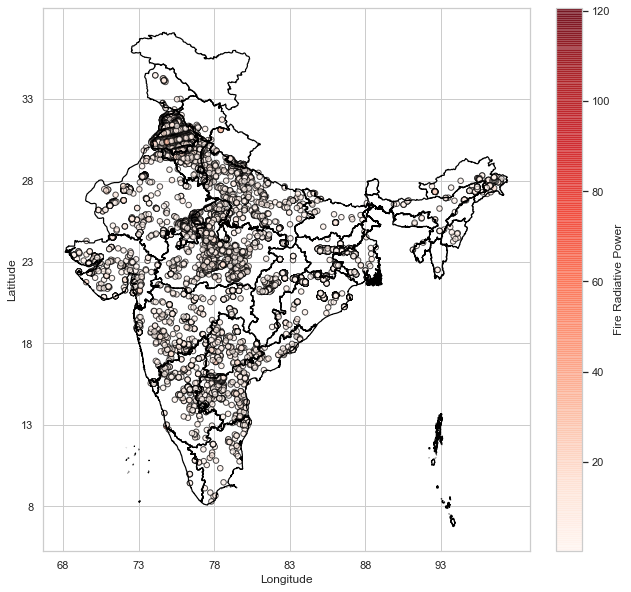

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable # layout tools for arranging subplots and colorbars.
import folium
from folium.plugins import HeatMap

fire_data_path = "C:/Users/shafi/Music/Diwali_Impact_Coding/Firecount/Country/Viirs_country/fire_nrt_J1V-C2_332644.csv"
fire_df = pd.read_csv(fire_data_path)

shapefile_path = "C:/Users/shafi/Music/Diwali_Impact_Coding/SpatialData/India_State_Boundary.shp"
india_gdf = gpd.read_file(shapefile_path)

fire_gdf = gpd.GeoDataFrame(fire_df, 
                            geometry=gpd.points_from_xy(fire_df.longitude, fire_df.latitude),
                            crs="EPSG:4326") # Converting df into gdf; 
# CRS="EPSG:4326"- standard coordinate system used for GPS and global mapping.

# Visualisation
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

india_gdf.boundary.plot(ax=ax, color="black", linewidth=1.2) # Plotting India boundary

sc = ax.scatter(fire_gdf.geometry.x, fire_gdf.geometry.y, 
                c=fire_gdf["frp"], cmap="Reds", alpha=0.7, edgecolor="black", s=30)

cbar = fig.colorbar(sc, cax=cax)
cbar.set_label("Fire Radiative Power", fontsize=12)

ax.set_xticks(range(int(fire_gdf.geometry.x.min()), int(fire_gdf.geometry.x.max()) + 1, 5))
ax.set_yticks(range(int(fire_gdf.geometry.y.min()), int(fire_gdf.geometry.y.max()) + 1, 5))
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
plt.show()


In [2]:
# Interactive Folium Map
m = folium.Map(location=[fire_gdf.geometry.y.mean(), fire_gdf.geometry.x.mean()], zoom_start=5)
folium.GeoJson(india_gdf, name="India Boundary", style_function=lambda x: {'color': 'black', 'weight': 1}).add_to(m)

# Add fire locations with FRP as intensity
heat_data = [[row.geometry.y, row.geometry.x, row.frp] for idx, row in fire_gdf.iterrows()]
HeatMap(heat_data, radius=10, blur=15, max_zoom=10).add_to(m)

# Add legend
# z-index: 9999; → legend stays above other map elements.
# padding: 10px; → Adds some space inside the box.
# border-radius: 5px; → Gives the box slightly rounded corners.
legend_html = ''' 
<div style="position: fixed;  
            bottom: 40px; left: 40px; width: 200px; height: 90px; 
            background-color: white; z-index:9999; font-size:14px;
            padding: 10px; border-radius: 5px;">
    <b>Fire Radiative Power (FRP)</b><br>
    <i>Higher intensity = Darker Red</i>
</div>
'''
# multi-line string
m.get_root().html.add_child(folium.Element(legend_html))

# Save map
m.save("fire_map.html")
# Display map
# m
